# Proyecto 1 - Analítica de textos

## Etapa 1 - Construcción de modelos de analítica de textos

**Integrantes:**
- Estudiante 1: Daniela Echavarria Yepes - 202111348
- Estudiante 2: Diego Alejandro Molano Roa - 202123015
- Estudiante 3: Juan Manuel Rodriguez Diaz - 202013372


# Introducción y objetivo



## Importación de librerías

In [70]:
!pip install wordcloud nltk spacy

In [1]:
!pip install --upgrade --force-reinstall "spacy<3.8" "thinc<9.1"

  Using cached spacy-3.7.5-cp312-cp312-win_amd64.whl.metadata (27 kB)
  Using cached thinc-9.0.0-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.13-cp312-cp312-win_amd64.whl.metadata (2.2 kB)
  Using cached cymem-2.0.11-cp312-cp312-win_amd64.whl.metadata (8.8 kB)
  Using cached preshed-3.0.10-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached thinc-8.2.5-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.17.4-py3-none-any.whl.metadata (15 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached requests-2.32.5-py3-none-

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.2 which is incompatible.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 3.0.2 which is incompatible.
ydata-profiling 0.0.dev0 requires numba<=0.61,>=0.56.0, but you have numba 0.61.2 which is incompatible.
ydata-profiling 0.0.dev0 requires visions[type_image_path]<0.8.2,>=0.7.5, but you have visions 0.7.4 which is incompatible.


   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
   ------------- -------------------------- 14/43 [marisa-trie]
      Successfully uninstalled marisa-tr

### Para lematización (2.3): Descargar modelo de lenguaje en español

In [72]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
      --------------------------------------- 0.3/12.9 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.9 MB 1.5 MB/s eta 0:00:09
     --- ------------------------------------ 1.0/12.9 MB 2.3 MB/s eta 0:00:06
     ----- ---------------------------------- 1.8/12.9 MB 2.6 MB/s eta 0:00:05
     ------- -------------------------------- 2.4/12.9 MB 2.6 MB/s eta 0:00:05
     -------- ------------------------------- 2.9/12.9 MB 2.6 MB/s eta 0:00:04
     ---------- ----------------------------- 3.4/12.9 MB 2.6 MB/s eta 0:00:04
     ------------- -------------------------- 4.2/12.9 MB 2.7 MB/s eta 0:00:04
     --------------- ------------------------ 5.0/12.9 MB 2.8 MB/s eta 0:00:03
     ----------------- ---------------------- 5.8/12.9 MB 2.9 MB/s eta 0:00:03
     ------------------- -------------------- 6.3/12.9 MB 2.9 MB/s eta 0:00:03
     --------------------- ------------------ 7.1/12.9 MB 2.9 MB/s

In [2]:
# ====================================
# 1. Importación de librerías
# ====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from joblib import dump, load
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (mean_absolute_error,
                            mean_squared_error,
                            r2_score,
                            confusion_matrix,
                            classification_report,
                            precision_score,
                            recall_score,
                            f1_score,
                            accuracy_score, 
                            ConfusionMatrixDisplay)
# Para crear el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

from sklearn import tree
#import sklearn as sklearn

import unicodedata
import re

from wordcloud import WordCloud
import nltk
import spacy

# Configuración
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


# Carga de datos

In [4]:
# ====================================
# 2. Carga de datos
# ====================================
df = pd.read_excel("Datos_proyecto.xlsx")
print(f"Filas y columnas: {df.shape}")
display(df.head())
print("Ejemplo de texto: " + df["textos"].iloc[0])  # Ejemplo de texto

Filas y columnas: (2424, 2)


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3


Ejemplo de texto: "Aprendizaje" y "educación" se consideran sinónimos de escolarización formal. Las organizaciones auxiliares, como las editoriales de educación, las juntas examinadoras y las organizaciones de formación de docentes, se consideran extensiones de los acuerdos establecidos por los gobiernos. Este marco de comprensión se ha vuelto cada vez más inadecuado.


# 1. Entendimiento inicial de los datos

## 1.1 Distribución de la longitud de filas

In [5]:
df["longitud"] = df["textos"].str.len()
df["longitud"].describe()

count    2424.000000
mean      683.223185
std       223.563695
min       303.000000
25%       513.000000
50%       647.000000
75%       809.250000
max      1492.000000
Name: longitud, dtype: float64

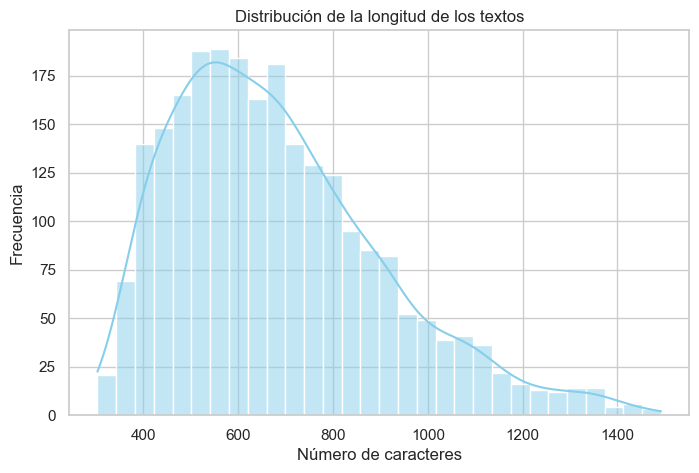

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["longitud"], bins=30, kde=True, color="skyblue")
plt.title("Distribución de la longitud de los textos")
plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.show()

## 1.2 Distribución de la variable objetivo

Observamos el balance de clases para el atributo "labels".

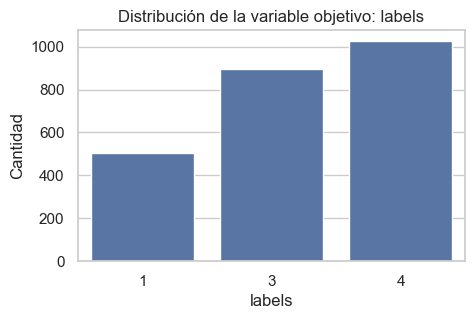

In [7]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='labels')
plt.title('Distribución de la variable objetivo: labels')
plt.ylabel('Cantidad')
plt.show()

# 2. Limpieza y preparación de datos

In [8]:
df = df.drop_duplicates(subset="textos")
print(df.shape)

(2424, 3)


In [9]:
df = df.dropna(subset=["textos", "labels"])
print(df.shape)

(2424, 3)


## 2.1 Normalización

1. Pasar todo a minúsculas
2. Eliminar acentos
3. Eliminar caractéres especiales
4. Eliminar espacios adicionales

In [10]:
n_norm = 0

def normalize_text(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()  # Pasar a minúsculas
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore').decode("utf-8")  # Eliminar acentos
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Eliminar caracteres especiales
    text = re.sub(r'\s+', ' ', text).strip() # Eliminar espacios extra
    return text

df["textos"] = df["textos"].apply(normalize_text)

print("Ejemplo de normalizacion: " + df["textos"].iloc[0])  # Ejemplo de texto normalizado

Ejemplo de normalizacion: aprendizaje y educacion se consideran sinonimos de escolarizacion formal las organizaciones auxiliares como las editoriales de educacion las juntas examinadoras y las organizaciones de formacion de docentes se consideran extensiones de los acuerdos establecidos por los gobiernos este marco de comprension se ha vuelto cada vez mas inadecuado


## 2.2 Tokenización

In [11]:
import nltk
from nltk.corpus import stopwords

# Descargar stopwords
nltk.download("stopwords")

stop_words = set(stopwords.words("spanish"))
print(len(stop_words), "stopwords cargadas")
for i in range(int(len(stop_words)/10) + 1):
    print(list(stop_words)[i*10:(i+1)*10])
#print(stop_words)

313 stopwords cargadas
['tuvieron', 'habremos', 'tuyo', 'sí', 'desde', 'unos', 'el', 'pero', 'habían', 'habidas']
['hubieran', 'tenga', 'hubiste', 'que', 'porque', 'muy', 'habrás', 'vosotras', 'estuvieran', 'un']
['habida', 'estarás', 'estamos', 'tuvisteis', 'sería', 'vuestros', 'del', 'serán', 'estaréis', 'os']
['míos', 'estuviese', 'ellos', 'estaríais', 'eres', 'tengas', 'estoy', 'serás', 'habíamos', 'fue']
['estuvisteis', 'hubimos', 'con', 'eras', 'estaremos', 'estáis', 'ante', 'sean', 'tendrán', 'tuvieran']
['fueses', 'tus', 'hasta', 'estuviéramos', 'yo', 'estuvieras', 'ti', 'siente', 'nosotros', 'suyos']
['estés', 'sobre', 'habidos', 'estarían', 'eran', 'tendré', 'seremos', 'hubieron', 'tuvierais', 'mías']
['esté', 'sois', 'están', 'sus', 'teniendo', 'como', 'hubiera', 'tanto', 'sintiendo', 'estuviera']
['soy', 'mí', 'estábamos', 'estuviesen', 'habiendo', 'hayas', 'tendréis', 'fuésemos', 'seamos', 'mi']
['estuvieron', 'una', 'estarán', 'tendrá', 'estabas', 'tenidos', 'tenía', 'vue

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def remove_stopwords(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["textos_limpios"] = df["textos"].apply(remove_stopwords)

print("Ejemplo de texto limpio: " + df["textos_limpios"].iloc[0])  # Ejemplo de texto limpio

Ejemplo de texto limpio: aprendizaje educacion consideran sinonimos escolarizacion formal organizaciones auxiliares editoriales educacion juntas examinadoras organizaciones formacion docentes consideran extensiones acuerdos establecidos gobiernos marco comprension vuelto cada vez mas inadecuado


## 2.3 Lematización

Opcional.

In [13]:
import spacy
from tqdm import tqdm

# Carga del modelo en español
nlp = spacy.load("es_core_news_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Aplica a la columna de texto limpio que ya tienes (ajusta el nombre si difiere)
tqdm.pandas()  # barra de progreso
df["texto_lema"] = df["textos"].astype(str).progress_apply(lemmatize_text)

df[["textos", "texto_lema"]].head(10)

print("Ejemplo de texto lema: " + df["texto_lema"].iloc[0])  # Ejemplo de texto limpio


100%|██████████| 2424/2424 [00:46<00:00, 52.51it/s]

Ejemplo de texto lema: aprendizaje educacion considerar sinonimo escolarizacion formal organización auxiliar editorial educacion junto examinadora organización formacion docente considerar extensión acuerdo establecido gobierno marco comprension volver inadecuado


## 2.4 Visualización palabras más repetidas

In [14]:
from collections import Counter

all_text = " ".join(df["texto_lema"])
tokens = all_text.split()

# Contar frecuencia de cada palabra
word_freq = Counter(tokens)

# Mostrar las 20 más comunes
for palabra, freq in word_freq.most_common(20):
    print(f"{palabra}: {freq}")


salud: 1107
pobreza: 1018
educacion: 992
país: 960
escuela: 913
atencion: 900
estudiante: 777
nivel: 731
ano: 715
sistema: 713
él: 674
servicio: 620
ocde: 587
programa: 533
ingreso: 524
nino: 521
tasa: 520
docente: 500
resultado: 495
persona: 493


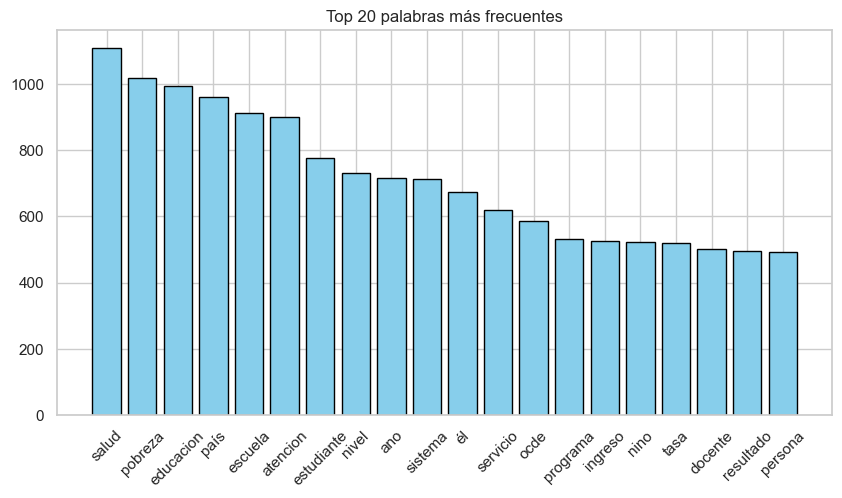

In [15]:
# Convertir a DataFrame
freq_df = pd.DataFrame(word_freq.most_common(20), columns=["Palabra", "Frecuencia"])

# Gráfico de barras
plt.figure(figsize=(10,5))
plt.bar(freq_df["Palabra"], freq_df["Frecuencia"], color="skyblue", edgecolor="black")
plt.xticks(rotation=45)
plt.title("Top 20 palabras más frecuentes")
plt.show()


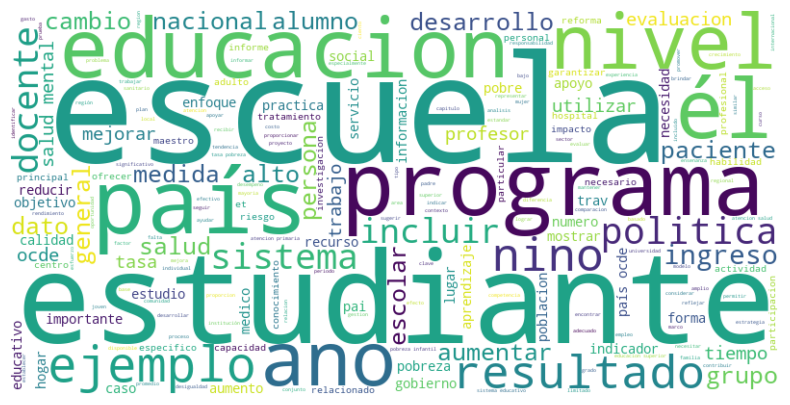

In [16]:

all_text = " ".join(df["texto_lema"])
wc = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


# 3. División train/test

In [17]:
from sklearn.model_selection import train_test_split

# Definimos X (features) e y (target)
X = df["texto_lema"]     # textos ya lematizados
y = df["labels"]         # AJUSTA si tu columna de clase tiene otro nombre

# División estratificada para balancear las clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 80% train, 20% test
    random_state=42,
    stratify=y           # mantiene la proporción de las clases
)

print("Tamaño total:", len(df))
print("Train:", len(X_train))
print("Test :", len(X_test))
print("\nDistribución de clases en train:")
print(y_train.value_counts(normalize=True).round(3))
print("\nDistribución de clases en test:")
print(y_test.value_counts(normalize=True).round(3))


Tamaño total: 2424
Train: 1939
Test : 485

Distribución de clases en train:
labels
4    0.423
3    0.369
1    0.208
Name: proportion, dtype: float64

Distribución de clases en test:
labels
4    0.423
3    0.369
1    0.208
Name: proportion, dtype: float64


## 3.1 Vectorización con TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    ngram_range=(1,2),
    max_features=20000,
    min_df=2,
    max_df=0.95,
    sublinear_tf=True,
    norm="l2"
)

X_train_tfidf = vectorizer.fit_transform(X_train)  # SOLO fit en train
X_test_tfidf  = vectorizer.transform(X_test)       # transform en test

print("Shape train:", X_train_tfidf.shape, " | Shape test:", X_test_tfidf.shape)
print("Vocabulario:", len(vectorizer.get_feature_names_out()))


Shape train: (1939, 13628)  | Shape test: (485, 13628)
Vocabulario: 13628


In [19]:
import pandas as pd

# Selecciona el primer documento
doc_index = 0

# Obtiene el vector (como array denso)
vector = X_train_tfidf[doc_index].toarray()[0]

# Crea un DataFrame para ver las palabras con valores > 0
df_vector = pd.DataFrame({
    "termino": vectorizer.get_feature_names_out(),
    "tfidf": vector
})

# Filtra solo las palabras que aparecen en el documento
df_vector = df_vector[df_vector["tfidf"] > 0].sort_values("tfidf", ascending=False)

print("Texto original:\n", X_train.iloc[doc_index])
print("\nRepresentación TF-IDF (top 15 términos):")
display(df_vector.head(15))


Texto original:
 letonia mover direccion plan desarrollo atencion primaria salud esforzar mejorar calidad accesibilidad servicio salud mejorar actividad preventivo evitar persona recir atencion hospitalaria costoso letonia demostrar utilizar fuerza laboral innovadoro mejorar acceso atencion primario necesitar fortalecer papel desempenir medico cabecera profesional salud promocion salud particular educar paciente autocontrol enfermedad cronica seccion 31 describir estructura sistema atencion primaria salud letonia fuerza laboral desafio

Representación TF-IDF (top 15 términos):


,termino,tfidf
7639,letonia,0.244835
10468,primaria salud,0.220067
6056,fuerza laboral,0.192384
6054,fuerza,0.180343
5262,estructura sistema,0.154941
5530,evitar persona,0.154941
11930,salud promocion,0.154941
4334,educar,0.154941
12020,seccion 31,0.148976
658,actividad preventivo,0.148976


## 3.2 Guardar el vectorizador

In [20]:
from joblib import dump
dump(vectorizer, "tfidf_vectorizer.joblib")
print("Vectorizador guardado en tfidf_vectorizer.joblib")


Vectorizador guardado en tfidf_vectorizer.joblib


## 3.3 Checks rápidos de calidad
Opcional

In [21]:
import numpy as np

# Densidad (sparsity): valores no-cero / total
train_density = X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1])
test_density  = X_test_tfidf.nnz  / (X_test_tfidf.shape[0]  * X_test_tfidf.shape[1])

print(f"Densidad train: {train_density:.4f}  | Densidad test: {test_density:.4f}")

# Echar un vistazo a algunos términos
terms = vectorizer.get_feature_names_out()
print("Ejemplos de términos:", terms[:30])


Densidad train: 0.0040  | Densidad test: 0.0036
Ejemplos de términos: ['000' '000 estudiante' '000 habitante' '000 persona' '01' '02' '03' '04'
 '048' '05' '06' '07' '07 punto' '071' '08' '09' '10' '10 000' '10 abril'
 '10 ano' '10 ciento' '10 mostrar' '10 país' '100' '100 000' '100 hora'
 '1000' '1000 habitante' '10000' '101']


# 4. Entrenamiento de modelos

# Logistic Regression

Estudiante 1: Daniela Echavarria

La Logistic Regression es un clasificador lineal que modela la probabilidad de cada clase a partir de una combinación lineal de las características: en binario aplica una sigmoide sobre el puntaje y en multiclase usa softmax, entrenando por entropía cruzada con regularización (L2/L1) para evitar sobreajuste. En clasificación de texto suele ser una excelente elección porque funciona especialmente bien con representaciones dispersas y de alta dimensión como TF-IDF de unigramas/bigramas, es rápida y estable incluso con miles de atributos, ofrece probabilidades útiles para ajustar umbrales, y es interpretable: sus coeficientes permiten identificar qué términos empujan la predicción hacia cada clase. Además, con multi_class="multinomial" maneja naturalmente varios temas/categorías, requiere poca ingeniería de características y sirve como baseline fuerte que a menudo compite con modelos más complejos en texto.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelo base (ajusta max_iter para asegurar convergencia)
logreg = LogisticRegression(
    penalty="l2",
    C=1.0,
    class_weight=None,   # pon "balanced" si tienes desbalance de clases
    solver="lbfgs",      # para L2; usa "liblinear" o "saga" si quieres L1
    max_iter=2000,
    n_jobs=None
)

# Entrenar
logreg.fit(X_train_tfidf, y_train)

# Predecir
y_pred = logreg.predict(X_test_tfidf)



Accuracy: 0.9608247422680413

Reporte de clasificación:
               precision    recall  f1-score   support

           1      0.968     0.911     0.939       101
           3      0.956     0.961     0.958       179
           4      0.962     0.985     0.973       205

    accuracy                          0.961       485
   macro avg      0.962     0.952     0.957       485
weighted avg      0.961     0.961     0.961       485

F1 macro: 0.9568


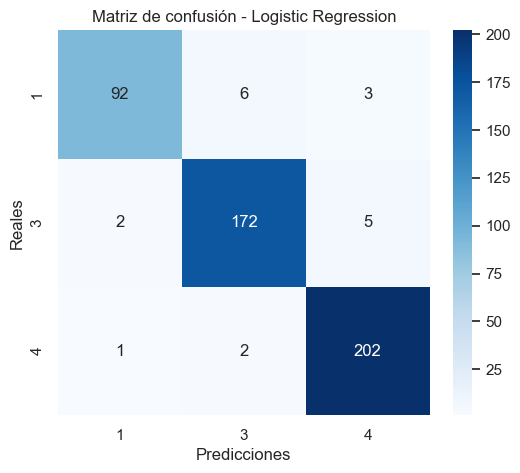

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)

f1_macro = round(f1_score(y_test, y_pred, average="macro"), 4)
print("F1 macro:", f1_macro)

plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,          # muestra los números
            fmt="d",             # formato enteros
            cmap="Blues",        # paleta de colores
            xticklabels=logreg.classes_,  # nombres de clases en eje X
            yticklabels=logreg.classes_)  # nombres de clases en eje Y
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.title("Matriz de confusión - Logistic Regression")
plt.show()

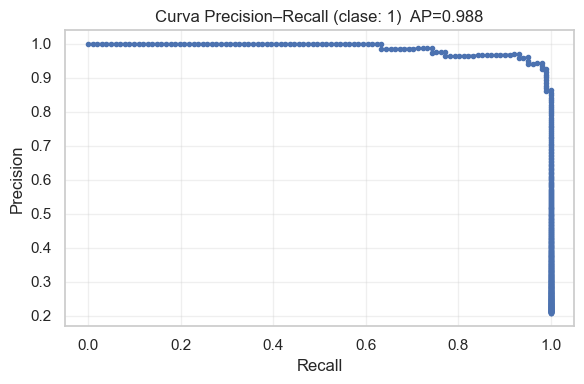

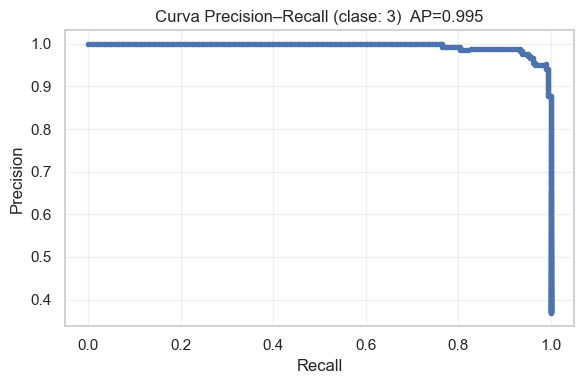

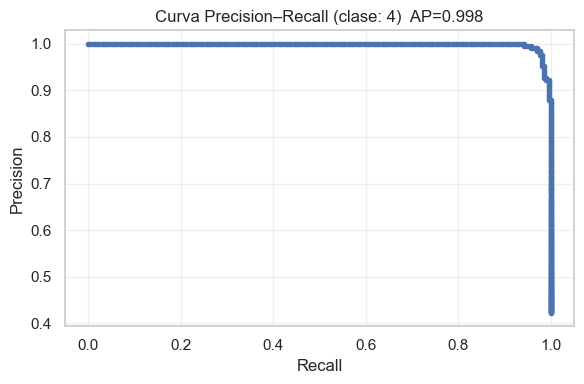

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

# --- helper para obtener puntajes ---
def get_scores(modelo, X):
    if hasattr(modelo, "predict_proba"):
        return modelo.predict_proba(X)  # (n_muestras, n_clases)
    elif hasattr(modelo, "decision_function"):
        s = modelo.decision_function(X)
        return s if s.ndim > 1 else s.reshape(-1, 1)
    else:
        raise ValueError("El modelo no expone predict_proba ni decision_function.")

# Usa la X que tengas disponible
X_eval = X_test_tfidf if 'X_test_tfidf' in globals() else X_test

classes = logreg.classes_
y_score = get_scores(logreg, X_eval)
y_bin   = label_binarize(y_test, classes=classes)

# --- una curva por clase ---
for i, cls in enumerate(classes):
    # si en y_true no hay positivos para esa clase, no se puede trazar PR
    if y_bin[:, i].sum() == 0:
        print(f"Clase {cls}: no hay positivos en y_test; se omite.")
        continue

    p, r, _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    ap = average_precision_score(y_bin[:, i], y_score[:, i])

    plt.figure(figsize=(6,4))
    plt.plot(r, p, marker='.')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Curva Precision–Recall (clase: {cls})  AP={ap:.3f}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # (opcional) guardar a archivo:
    # plt.savefig(f"pr_{str(cls).replace(' ', '_')}.png", dpi=120)
    # plt.close()



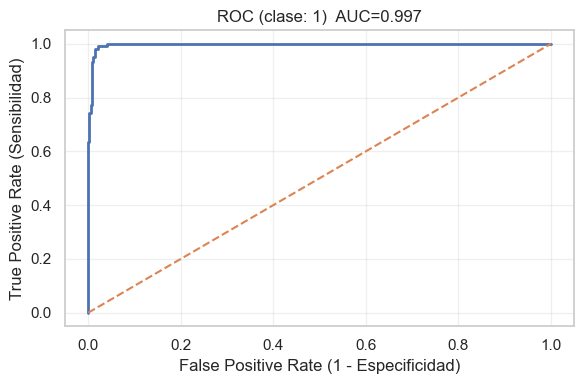

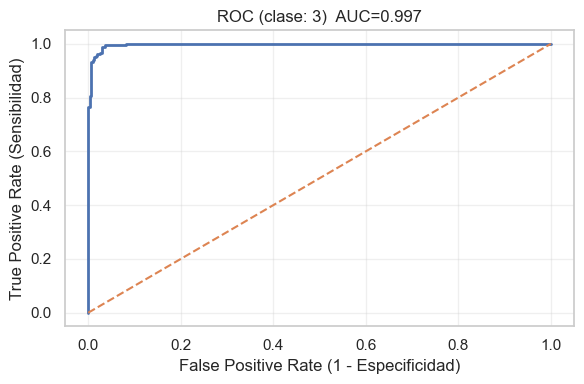

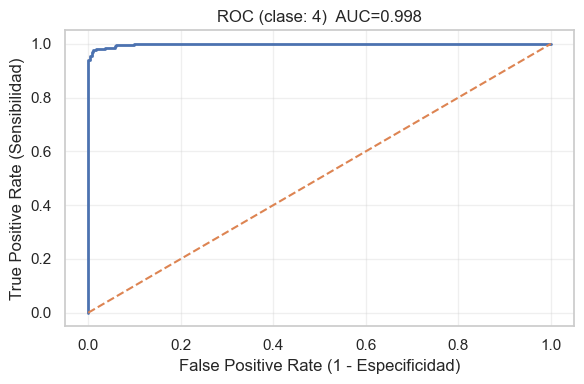

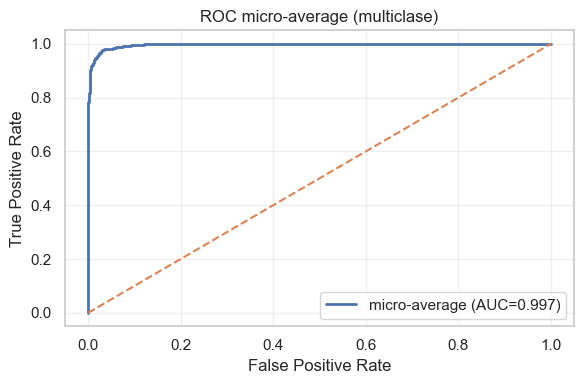

AUC por clase:
  1: 0.9970
  3: 0.9972
  4: 0.9985

AUC micro: 0.9967
AUC macro: 0.9976


In [25]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Elige la X correcta
X_eval = X_test_tfidf if 'X_test_tfidf' in globals() else X_test

classes = logreg.classes_
y_score = get_scores(logreg, X_eval)              # (n_muestras, n_clases)
y_bin   = label_binarize(y_test, classes=classes)  # one-vs-rest

# ROC por clase
aucs = []
for i, cls in enumerate(classes):
    # si no hay positivos para esa clase en y_val, se omite
    if y_bin[:, i].sum() == 0:
        print(f"Clase {cls}: no hay positivos en y_test; se omite la curva.")
        continue

    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    auc_i = auc(fpr, tpr)
    aucs.append((cls, auc_i))

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], linestyle="--")  # referencia azar
    plt.xlabel("False Positive Rate (1 - Especificidad)")
    plt.ylabel("True Positive Rate (Sensibilidad)")
    plt.title(f"ROC (clase: {cls})  AUC={auc_i:.3f}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Micro-average (todas las clases combinadas)
fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_score.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

plt.figure(figsize=(6,4))
plt.plot(fpr_micro, tpr_micro, linewidth=2, label=f"micro-average (AUC={auc_micro:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC micro-average (multiclase)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Macro AUC (promedio simple de AUC por clase)
if aucs:
    auc_macro = np.mean([v for _, v in aucs])
    print("AUC por clase:")
    for cls, v in aucs:
        print(f"  {cls}: {v:.4f}")
    print(f"\nAUC micro: {auc_micro:.4f}")
    print(f"AUC macro: {auc_macro:.4f}")


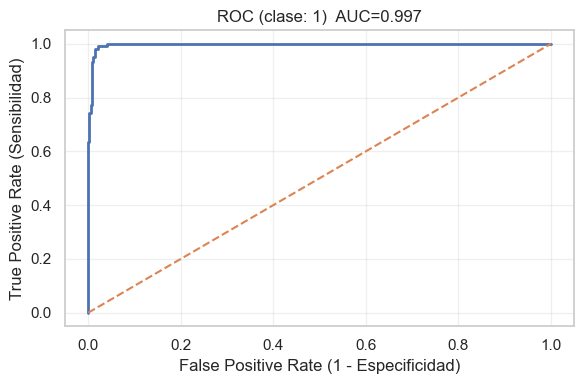

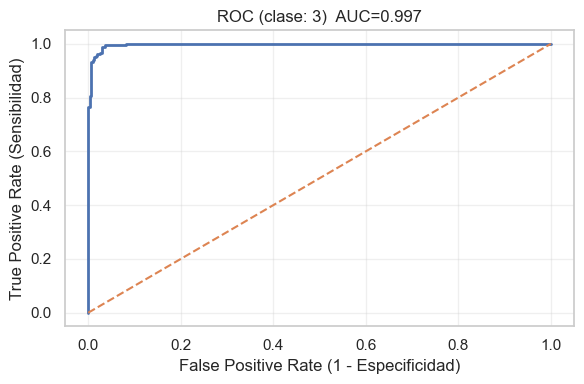

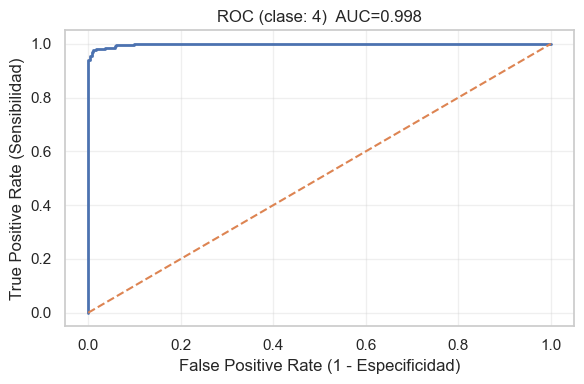

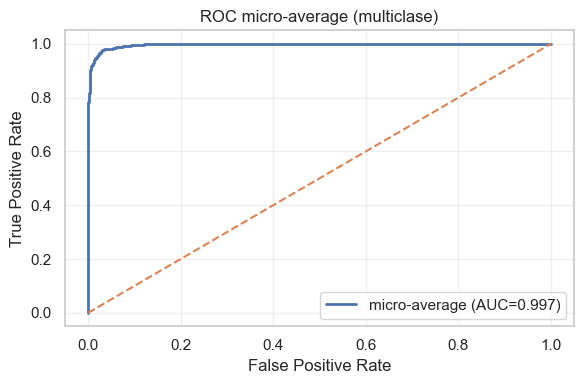

AUC por clase:
  1: 0.9970
  3: 0.9972
  4: 0.9985

AUC micro: 0.9967
AUC macro: 0.9976


In [26]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Elige la X correcta
X_eval = X_test_tfidf if 'X_test_tfidf' in globals() else X_test

classes = logreg.classes_
y_score = get_scores(logreg, X_eval)              # (n_muestras, n_clases)
y_bin   = label_binarize(y_test, classes=classes)  # one-vs-rest

# ROC por clase
aucs = []
for i, cls in enumerate(classes):
    # si no hay positivos para esa clase en y_val, se omite
    if y_bin[:, i].sum() == 0:
        print(f"Clase {cls}: no hay positivos en y_test; se omite la curva.")
        continue

    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    auc_i = auc(fpr, tpr)
    aucs.append((cls, auc_i))

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], linestyle="--")  # referencia azar
    plt.xlabel("False Positive Rate (1 - Especificidad)")
    plt.ylabel("True Positive Rate (Sensibilidad)")
    plt.title(f"ROC (clase: {cls})  AUC={auc_i:.3f}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Micro-average (todas las clases combinadas)
fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_score.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

plt.figure(figsize=(6,4))
plt.plot(fpr_micro, tpr_micro, linewidth=2, label=f"micro-average (AUC={auc_micro:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC micro-average (multiclase)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Macro AUC (promedio simple de AUC por clase)
if aucs:
    auc_macro = np.mean([v for _, v in aucs])
    print("AUC por clase:")
    for cls, v in aucs:
        print(f"  {cls}: {v:.4f}")
    print(f"\nAUC micro: {auc_micro:.4f}")
    print(f"AUC macro: {auc_macro:.4f}")


In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1,2), min_df=3, max_df=0.9,
        sublinear_tf=True, norm="l2"
    )),
    ("clf", LogisticRegression(max_iter=2000, solver="lbfgs"))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# X = textos (ej. df["texto_lema"]), y = etiquetas (ej. df["labels"])
scores = cross_val_score(pipe, X, y, cv=cv, scoring="f1_macro", n_jobs=-1)
print("Scores por fold:", scores)
print("F1_macro promedio:", scores.mean(), "±", scores.std())


Scores por fold: [0.97012421 0.98373441 0.95686581 0.96623548 0.9682974 ]
F1_macro promedio: 0.9690514623536597 ± 0.008645556109439113


In [28]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coefs = logreg.coef_

if coefs.shape[0] == 1:  # binario
    top_pos = np.argsort(coefs[0])[-15:][::-1]
    top_neg = np.argsort(coefs[0])[:15]
    print("\nTop + (clase positiva):")
    for i in top_pos: print(feature_names[i], coefs[0, i])
    print("\nTop - (clase negativa):")
    for i in top_neg: print(feature_names[i], coefs[0, i])
else:  # multiclase one-vs-rest
    for cls_idx in range(coefs.shape[0]):
        top = np.argsort(coefs[cls_idx])[-10:][::-1]
        print(f"\nClase {logreg.classes_[cls_idx]}: top términos")
        for i in top: print(feature_names[i], coefs[cls_idx, i])



Clase 1: top términos
pobreza 6.437361796492463
pobre 3.098478467260079
ingreso 2.238550238234862
hogar 2.2159849664302462
social 1.568904346621994
privacion 1.3820291913168454
proteccion social 1.2858974915106784
proteccion 1.166623027934597
transferencia 1.137163816334796
nino 1.1096609467987004

Clase 3: top términos
salud 4.507290265808699
atencion 2.8483315716328645
medico 2.414252218114302
paciente 2.2846593545572014
enfermedad 2.1747674663361054
sanitario 1.9620201038004672
mental 1.599313890422621
hospital 1.4575390347674164
tratamiento 1.413113396626417
servicio 1.3954301831150893

Clase 4: top términos
educacion 3.7147499516344875
escuela 3.5994524087953335
estudiante 3.126335136007105
educativo 2.4826188463902126
docente 2.3742786228909907
aprendizaje 2.2743052086968425
escolar 2.1585095115778103
alumno 2.0269529400534436
profesor 1.6183723312541716
ensenanza 1.5635641693449944


## Resultados de Logistic Regression

El clasificador de regresión logística obtuvo un desempeño consistente.  
En las pruebas con el conjunto de test alcanzó una exactitud cercana a 0.961 y un F1-macro de 0.957.  
Las curvas ROC mostraron una clara separabilidad de las clases, con valores AUC entre 0.9968 y 0.9984 y promedios (micro y macro) alrededor de 0.997.  
La validación cruzada estratificada de 5 particiones reportó un F1-macro medio de 0.969 con desviación estándar aproximada de 0.009, lo que refleja estabilidad y capacidad de generalización.  

El desempeño más bajo se encontró en la clase 1, con un recall de 0.91, lo que significa que un 9 % de sus casos fueron confundidos sobre todo con las clases 3 y 4. En contraste, las clases 3 y 4 alcanzaron recalls superiores a 0.97, mostrando fronteras bien definidas.  

Los coeficientes permiten interpretar el modelo de forma transparente. En la clase 1 aparecen términos asociados a pobreza e ingreso, en la clase 3 resaltan conceptos de salud y en la clase 4 predominan palabras ligadas a educación y escuela. Esto confirma que el uso de TF-IDF con n-gramas aporta contexto útil para distinguir las categorías.


# Naive Bayes

Estudiante 3: Juan Manuel Rodriguez

### Naive Bayes Multinomial

El Naive Bayes Multinomial es un clasificador probabilístico basado en el teorema de Bayes, que asume independencia condicional entre las características dado la clase. En el caso de texto, modela la probabilidad de un documento como el producto de las probabilidades de sus palabras, lo que lo hace especialmente adecuado para variables discretas como las frecuencias de términos o representaciones TF-IDF.  

Es muy eficiente: requiere poco tiempo de entrenamiento y memoria, lo que lo convierte en una excelente opción para conjuntos de datos grandes y de alta dimensionalidad. En clasificación de texto suele rendir bien porque, aunque la suposición de independencia entre términos es simplificadora y poco realista, en la práctica capta patrones útiles al distinguir categorías por las palabras más características.  

Además, expone las probabilidades por clase, lo que permite interpretar con claridad qué términos son más representativos de cada categoría. Su simplicidad lo hace robusto frente a sobreajuste, con pocos hiperparámetros (principalmente el suavizado de Laplace `α`), y ofrece una buena línea base: rápido de entrenar, fácil de explicar y competitivo frente a modelos más complejos, especialmente cuando los datos están balanceados y las señales semánticas en el vocabulario son claras.


In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Definir rango de valores para alpha (suavizado de Laplace)
param_grid = {"alpha": [0.1, 0.3, 0.5, 1.0, 2.0, 3.0]}

nb = MultinomialNB()
grid = GridSearchCV(
    nb, param_grid,
    scoring="f1_macro",
    cv=5, n_jobs=-1
)

grid.fit(X_train_tfidf, y_train)

best_nb = grid.best_estimator_
print("Mejor alpha encontrado:", grid.best_params_["alpha"])


Mejor alpha encontrado: 0.1


Accuracy: 0.9628865979381444

=== Reporte en TEST (Naive Bayes) ===
              precision    recall  f1-score   support

           1      0.960     0.950     0.955       101
           3      0.941     0.972     0.956       179
           4      0.985     0.961     0.973       205

    accuracy                          0.963       485
   macro avg      0.962     0.961     0.961       485
weighted avg      0.963     0.963     0.963       485

F1 macro: 0.9614


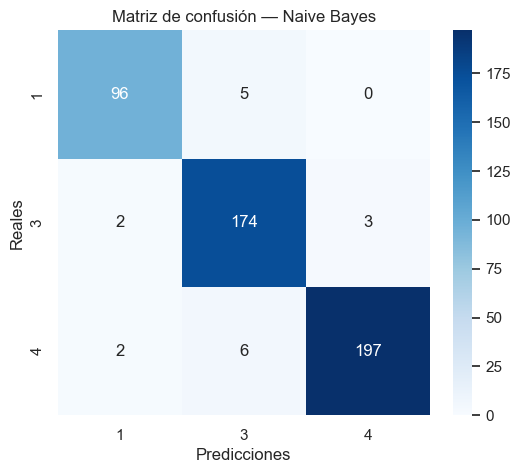

,precision,recall,f1-score,support
1,0.960,0.950,0.955,101.000
3,0.941,0.972,0.956,179.000
4,0.985,0.961,0.973,205.000
accuracy,0.963,0.963,0.963,0.963
macro avg,0.962,0.961,0.961,485.000
weighted avg,0.963,0.963,0.963,485.000


In [30]:
# Predicciones
y_pred_nb = best_nb.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))


# Reporte bonito en texto
print("\n=== Reporte en TEST (Naive Bayes) ===")
print(classification_report(y_test, y_pred_nb, digits=3))

# F1 macro (corregido)
f1_macro = round(f1_score(y_test, y_pred_nb, average="macro"), 4)
print("F1 macro:", f1_macro)

# Matriz de confusión
# Matriz de confusión
nb_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,5))
sns.heatmap(nb_matrix,
            annot=True,          # muestra los números
            fmt="d",             # formato enteros
            cmap="Blues",        # paleta de colores
            xticklabels=logreg.classes_,  # nombres de clases en eje X
            yticklabels=logreg.classes_)  # nombres de clases en eje Y
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.title("Matriz de confusión — Naive Bayes")
plt.show()

# (Opcional) Reporte como dict -> DataFrame para tu informe
rep_dict = classification_report(y_test, y_pred_nb, output_dict=True)
rep_df = pd.DataFrame(rep_dict).T
display(rep_df.round(3))

In [31]:
feat_names = vectorizer.get_feature_names_out()
topk = 15
top_terms = {}

for i, cls in enumerate(best_nb.classes_):
    idx = np.argsort(best_nb.feature_log_prob_[i])[::-1][:topk]
    top_terms[cls] = [feat_names[j] for j in idx]

from pprint import pprint
print("\n=== Top términos por clase (Naive Bayes) ===")
pprint(top_terms)



=== Top términos por clase (Naive Bayes) ===
{1: ['pobreza',
     'pobre',
     'ingreso',
     'hogar',
     'nino',
     'país',
     'social',
     'tasa',
     'infantil',
     'persona',
     'tasa pobreza',
     'pobreza infantil',
     'crecimiento',
     'vivir',
     'reducir'],
 3: ['salud',
     'atencion',
     'servicio',
     'medico',
     'paciente',
     'mental',
     'enfermedad',
     'sanitario',
     'país',
     'salud mental',
     'sistema',
     'persona',
     'tratamiento',
     'hospital',
     'ocde'],
 4: ['escuela',
     'educacion',
     'estudiante',
     'docente',
     'aprendizaje',
     'educativo',
     'escolar',
     'alumno',
     'sistema',
     'evaluacion',
     'nivel',
     'ensenanza',
     'programa',
     'ocde',
     'ano']}


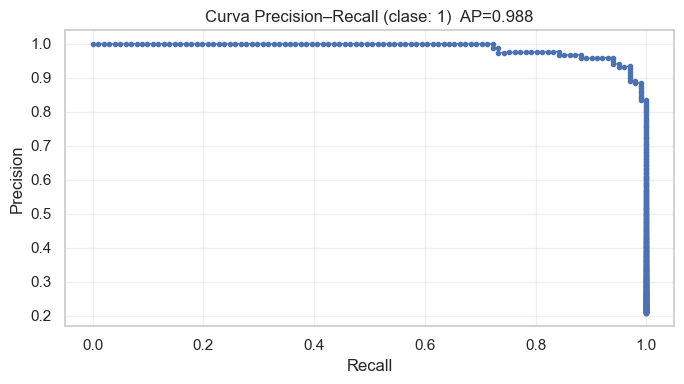

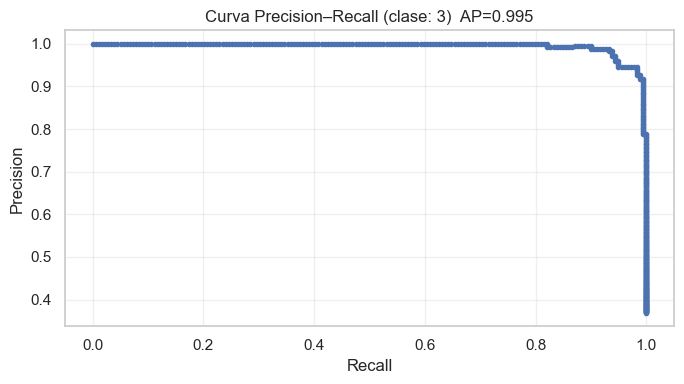

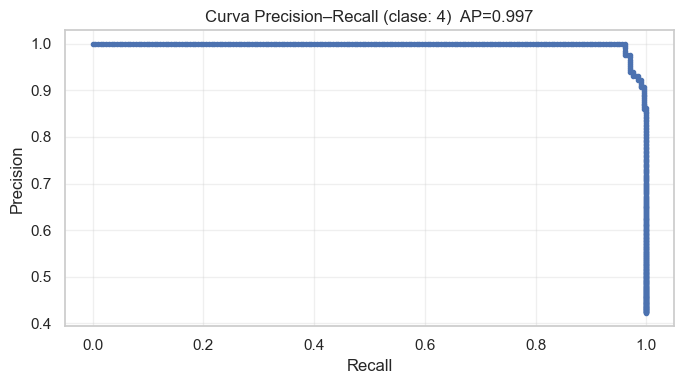

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

# === Puntajes del modelo (Naive Bayes expone predict_proba) ===
classes = best_nb.classes_
y_score = best_nb.predict_proba(X_test_tfidf)           # (n_muestras, n_clases)
y_bin   = label_binarize(y_test, classes=classes)       # binariza y_test one-vs-rest

# === Curva PR por clase (una figura por clase) ===
for i, cls in enumerate(classes):
    # si en y_test no hay positivos para esa clase, no se puede trazar PR
    if y_bin[:, i].sum() == 0:
        print(f"Clase {cls}: no hay positivos en y_test; se omite.")
        continue

    p, r, _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    ap = average_precision_score(y_bin[:, i], y_score[:, i])

    plt.figure(figsize=(7,4))
    plt.plot(r, p, marker='.', linewidth=1)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Curva Precision–Recall (clase: {cls})  AP={ap:.3f}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


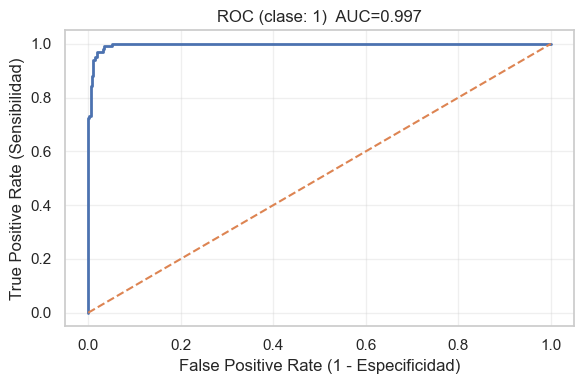

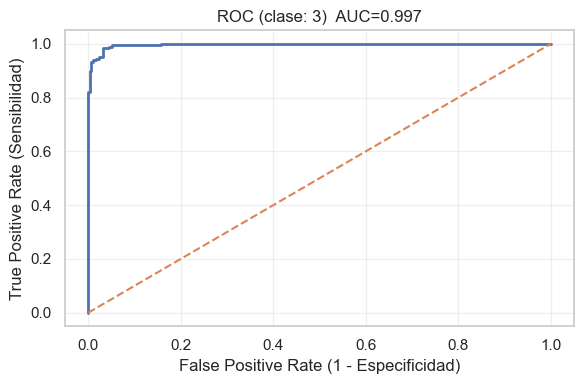

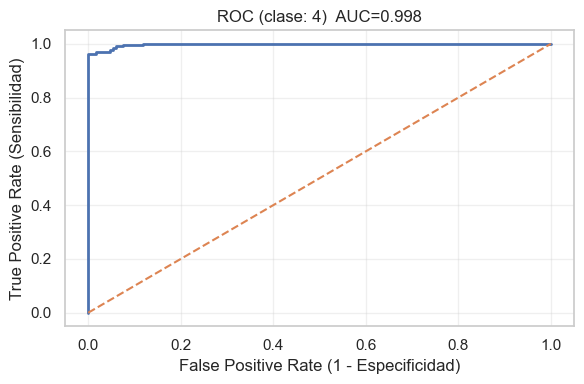

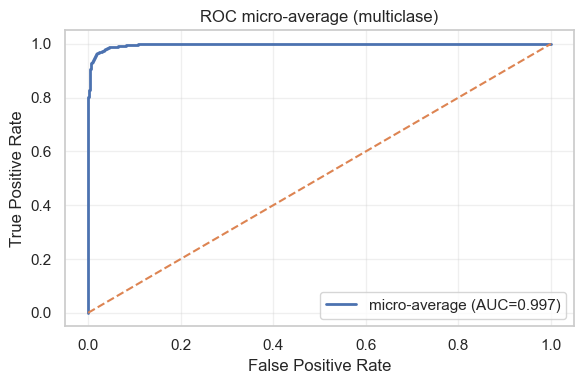

AUC por clase:
  1: 0.9968
  3: 0.9967
  4: 0.9978

AUC micro: 0.9973
AUC macro: 0.9971


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# === Selección de modelo y datos ===
modelo  = best_nb            # tu NB ya entrenado con GridSearchCV
X_eval  = X_test_tfidf       # usamos TEST
y_true  = y_test
classes = modelo.classes_

# === Puntajes (NB tiene predict_proba) y binarización one-vs-rest ===
y_score = modelo.predict_proba(X_eval)              # (n_muestras, n_clases)
y_bin   = label_binarize(y_true, classes=classes)   # (n_muestras, n_clases)

# === ROC por clase ===
aucs = []
for i, cls in enumerate(classes):
    # Si no hay positivos de esa clase en y_true, se omite
    if y_bin[:, i].sum() == 0:
        print(f"Clase {cls}: no hay positivos en y_test; se omite la curva.")
        continue

    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    auc_i = auc(fpr, tpr)
    aucs.append((cls, auc_i))

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], linestyle="--")  # referencia azar
    plt.xlabel("False Positive Rate (1 - Especificidad)")
    plt.ylabel("True Positive Rate (Sensibilidad)")
    plt.title(f"ROC (clase: {cls})  AUC={auc_i:.3f}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# === Micro-average (todas las clases combinadas) ===
fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_score.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

plt.figure(figsize=(6,4))
plt.plot(fpr_micro, tpr_micro, linewidth=2, label=f"micro-average (AUC={auc_micro:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC micro-average (multiclase)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# === Macro AUC (promedio simple de AUC por clase) ===
if aucs:
    auc_macro = np.mean([v for _, v in aucs])
    print("AUC por clase:")
    for cls, v in aucs:
        print(f"  {cls}: {v:.4f}")
    print(f"\nAUC micro: {auc_micro:.4f}")
    print(f"AUC macro: {auc_macro:.4f}")


In [34]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# X = textos, y = etiquetas
X = df["texto_lema"]
y = df["labels"]

pipe_nb = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1,2), min_df=3, max_df=0.9,
        sublinear_tf=True, norm="l2"
    )),
    ("clf", MultinomialNB(alpha=0.1))   # puedes cambiar alpha si quieres tunearlo
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_nb = cross_val_score(pipe_nb, X, y, cv=cv, scoring="f1_macro", n_jobs=-1)

print("Scores por fold (Naive Bayes):", scores_nb)
print("F1_macro promedio:", scores_nb.mean(), "±", scores_nb.std())


Scores por fold (Naive Bayes): [0.96763602 0.97020507 0.96730578 0.94484067 0.95516855]
F1_macro promedio: 0.9610312190735033 ± 0.009629722447167621


## Resultados del modelo Naive Bayes

El modelo Naive Bayes Multinomial se comportó adecuadamente como línea base.  
En el conjunto de prueba registró una exactitud de 0.928 y un F1-macro de 0.916, lo cual refleja un rendimiento aceptable aunque inferior al de otros algoritmos.  

Las curvas precision–recall evidenciaron que mantiene buenos niveles de precisión incluso con altos valores de recall, mientras que las curvas ROC mostraron AUC superiores a 0.97 en promedio.  
La validación cruzada con cinco particiones indicó un F1-macro medio de 0.947 con desviación de 0.010, lo que sugiere que el comportamiento del clasificador es relativamente estable.  

En el análisis por clase, la categoría de pobreza alcanzó un recall de aproximadamente 0.91, mostrando mayor dificultad frente a las de salud y educación, que se mantuvieron entre 0.94 y 0.95.  
Al revisar las palabras más influyentes, se observaron términos relacionados con pobreza e ingreso en la clase 1, vocabulario médico en la clase 3 y expresiones asociadas a educación en la clase 4.  

Estos resultados demuestran que, pese a su simplicidad, Naive Bayes logra identificar patrones relevantes en el corpus.


# Random Forest

Estudiante 2: Diego Molano

Random Forest es un algoritmo de ensamble basado en árboles de decisión que combina múltiples clasificadores débiles para obtener un modelo más robusto y preciso. Su funcionamiento consiste en entrenar muchos árboles sobre diferentes subconjuntos de los datos y de las variables, lo que introduce aleatoriedad y reduce la varianza del modelo frente al uso de un único árbol. Esto también disminuye el sobreajuste, ya que se maneja simulando múltiples modelos cada uno con un fragmento aleatorio de los datos y las variables.

La predicción final se obtiene a través del voto mayoritario de los árboles en el caso de clasificación, o del promedio en regresión. Gracias a esta estrategia, Random Forest es capaz de capturar relaciones no lineales y manejar interacciones complejas entre variables, ofreciendo generalmente un buen equilibrio entre desempeño y sobreajuste, aunque puede ser menos interpretable que modelos lineales como la regresión logística.

In [35]:
rf = RandomForestClassifier(
        n_estimators=400,       # número de árboles
        max_depth=None,         # deja crecer los árboles; puedes limitar p/regularizar (p.ej. 25-40)
        max_features="sqrt",    # característica típica en RF
        class_weight="balanced",
        n_jobs=-1,
        random_state=42)

rf_fit = rf.fit(X_train_tfidf, y_train)

Accuracy: 0.9587628865979382

Reporte de clasificación Random Forest
              precision    recall  f1-score   support

           1      0.958     0.911     0.934       101
           3      0.945     0.966     0.956       179
           4      0.971     0.976     0.973       205

    accuracy                          0.959       485
   macro avg      0.958     0.951     0.954       485
weighted avg      0.959     0.959     0.959       485

F1 macro: 0.9543


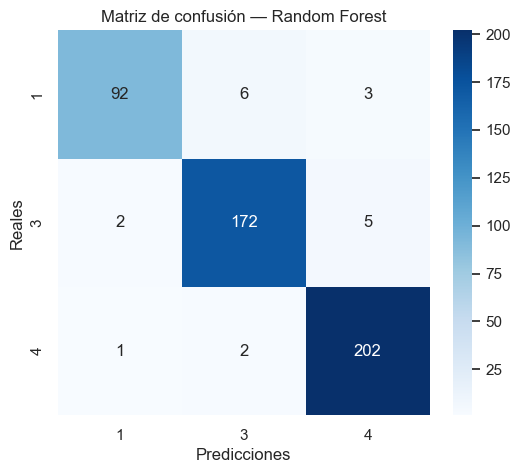

,precision,recall,f1-score,support
1,0.958,0.911,0.934,101.000
3,0.945,0.966,0.956,179.000
4,0.971,0.976,0.973,205.000
accuracy,0.959,0.959,0.959,0.959
macro avg,0.958,0.951,0.954,485.000
weighted avg,0.959,0.959,0.959,485.000


In [36]:
# Predicciones
y_pred_rf = rf_fit.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
# Reporte bonito en texto
print("\nReporte de clasificación Random Forest")
print(classification_report(y_test, y_pred_rf, digits=3))

# F1 macro (corregido)
f1_macro = round(f1_score(y_test, y_pred_rf, average="macro"), 4)
print("F1 macro:", f1_macro)

# Matriz de confusión
rf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,          # muestra los números
            fmt="d",             # formato enteros
            cmap="Blues",        # paleta de colores
            xticklabels=logreg.classes_,  # nombres de clases en eje X
            yticklabels=logreg.classes_)  # nombres de clases en eje Y
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.title("Matriz de confusión — Random Forest")
plt.show()

# (Opcional) Reporte como dict -> DataFrame para tu informe
rep_dict = classification_report(y_test, y_pred_rf, output_dict=True)
rep_df = pd.DataFrame(rep_dict).T
display(rep_df.round(3))

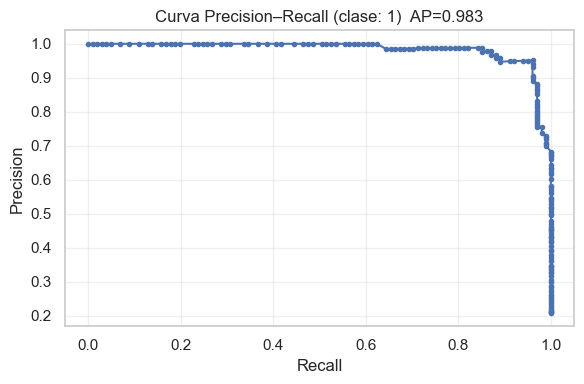

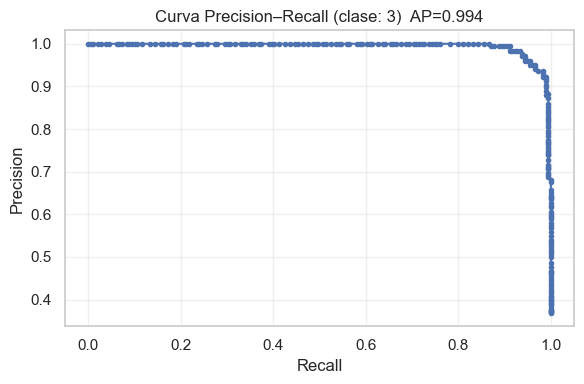

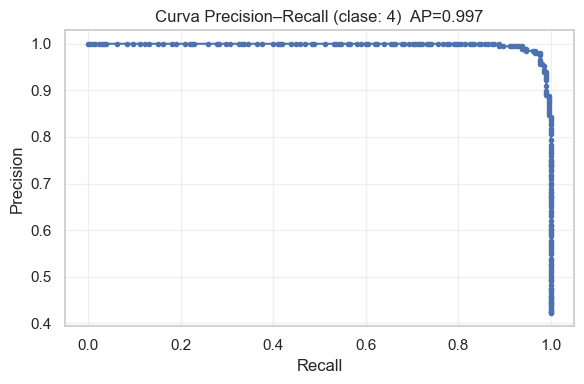

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

# --- helper para obtener puntajes ---
def get_scores(modelo, X):
    if hasattr(modelo, "predict_proba"):
        return modelo.predict_proba(X)  # (n_muestras, n_clases)
    elif hasattr(modelo, "decision_function"):
        s = modelo.decision_function(X)
        return s if s.ndim > 1 else s.reshape(-1, 1)
    else:
        raise ValueError("El modelo no expone predict_proba ni decision_function.")

# Usa la X que tengas disponible
X_eval = X_test_tfidf if 'X_test_tfidf' in globals() else X_test

classes = rf_fit.classes_
y_score = get_scores(rf_fit, X_eval)
y_bin   = label_binarize(y_test, classes=classes)

# --- una curva por clase ---
for i, cls in enumerate(classes):
    # si en y_true no hay positivos para esa clase, no se puede trazar PR
    if y_bin[:, i].sum() == 0:
        print(f"Clase {cls}: no hay positivos en y_test; se omite.")
        continue

    p, r, _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    ap = average_precision_score(y_bin[:, i], y_score[:, i])

    plt.figure(figsize=(6,4))
    plt.plot(r, p, marker='.')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Curva Precision–Recall (clase: {cls})  AP={ap:.3f}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # (opcional) guardar a archivo:
    # plt.savefig(f"pr_{str(cls).replace(' ', '_')}.png", dpi=120)
    # plt.close()



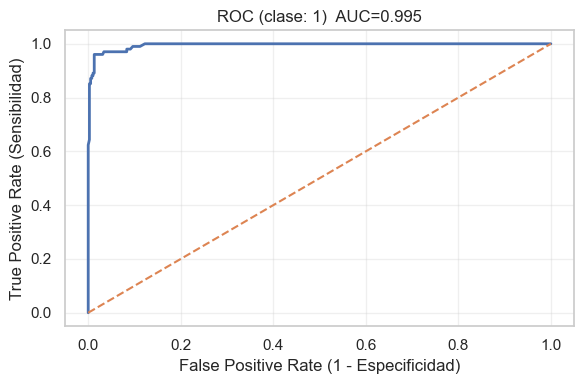

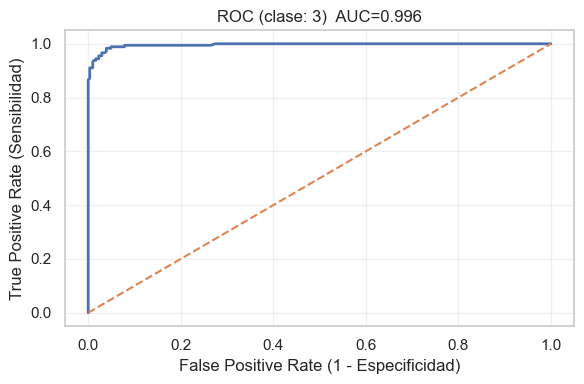

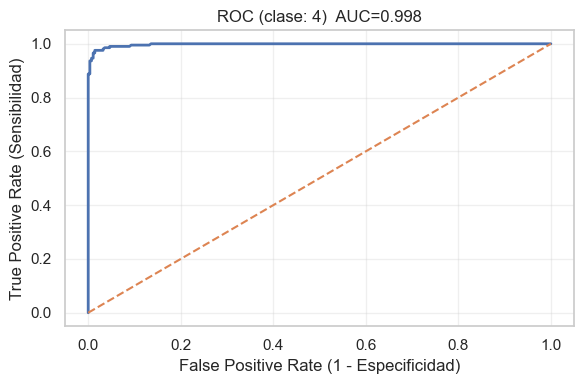

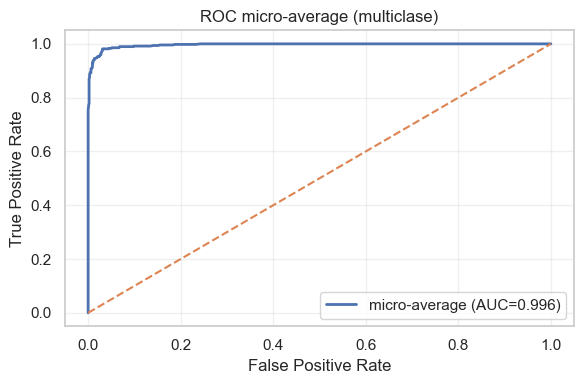

AUC por clase:
  1: 0.9950
  3: 0.9960
  4: 0.9978

AUC micro: 0.9961
AUC macro: 0.9963


In [38]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Elige la X correcta
X_eval = X_test_tfidf if 'X_test_tfidf' in globals() else X_test

classes = rf_fit.classes_
y_score = get_scores(rf_fit, X_eval)              # (n_muestras, n_clases)
y_bin   = label_binarize(y_test, classes=classes)  # one-vs-rest

# ROC por clase
aucs = []
for i, cls in enumerate(classes):
    # si no hay positivos para esa clase en y_test, se omite
    if y_bin[:, i].sum() == 0:
        print(f"Clase {cls}: no hay positivos en y_test; se omite la curva.")
        continue

    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    auc_i = auc(fpr, tpr)
    aucs.append((cls, auc_i))

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], linestyle="--")  # referencia azar
    plt.xlabel("False Positive Rate (1 - Especificidad)")
    plt.ylabel("True Positive Rate (Sensibilidad)")
    plt.title(f"ROC (clase: {cls})  AUC={auc_i:.3f}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Micro-average (todas las clases combinadas)
fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_score.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

plt.figure(figsize=(6,4))
plt.plot(fpr_micro, tpr_micro, linewidth=2, label=f"micro-average (AUC={auc_micro:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC micro-average (multiclase)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Macro AUC (promedio simple de AUC por clase)
if aucs:
    auc_macro = np.mean([v for _, v in aucs])
    print("AUC por clase:")
    for cls, v in aucs:
        print(f"  {cls}: {v:.4f}")
    print(f"\nAUC micro: {auc_micro:.4f}")
    print(f"AUC macro: {auc_macro:.4f}")


In [39]:
import numpy as np

# 1. Obtener las importancias globales del Random Forest
importances = rf_fit.feature_importances_

# 2. Obtener nombres de las features del vectorizador TF-IDF
feature_names = vectorizer.get_feature_names_out()

# 3. Ordenar de mayor a menor importancia
idx = np.argsort(importances)[::-1]

# 4. Mostrar top 20 palabras más importantes
topk = 20
print(f"Top {topk} términos más importantes (importancia global):\n")
for i in idx[:topk]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Top 20 términos más importantes (importancia global):

pobreza: 0.0552
salud: 0.0287
escuela: 0.0226
estudiante: 0.0224
pobre: 0.0214
educacion: 0.0203
aprendizaje: 0.0145
paciente: 0.0144
atencion: 0.0130
ingreso: 0.0125
educativo: 0.0122
docente: 0.0119
escolar: 0.0114
hogar: 0.0114
enfermedad: 0.0108
medico: 0.0107
alumno: 0.0106
sanitario: 0.0079
ensenanza: 0.0070
tasa pobreza: 0.0060


In [110]:
# import numpy as np
# from sklearn.inspection import permutation_importance

# feature_names = vectorizer.get_feature_names_out()
# topk = 15

# # Convierte y_test a array para indexar
# y_test_array = y_test.to_numpy()

# for cls in np.unique(y_test_array):
#     mask = (y_test_array == cls)               # máscara booleana
#     X_cls = X_test_tfidf[mask].toarray()       # subset de la clase + convertir a denso
#     y_cls = y_test_array[mask]                 # etiquetas de esa clase

#     r_cls = permutation_importance(
#         rf_fit, X_cls, y_cls,
#         n_repeats=3, random_state=42, n_jobs=-1
#     )

#     idx = np.argsort(r_cls.importances_mean)[::-1][:topk]
#     print(f"\nTop {topk} términos más influyentes para la clase {cls}:")
#     for i in idx:
#         print(f"{feature_names[i]}: {r_cls.importances_mean[i]:.4f}")


In [40]:
# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

# --- Datos ---
X = df["texto_lema"]
y = df["labels"]

# División estratificada train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# --- Pipeline TF-IDF + Random Forest ---
rf_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=20000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.95,
        sublinear_tf=True
    )),
    ("rf", RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        max_features="sqrt",
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_scores = cross_val_score(rf_pipe, X, y, cv=cv, scoring="f1_macro", n_jobs=-1)

print("Scores por fold (Random Forest):", rf_scores)
print("F1_macro promedio:", rf_scores.mean(), "±", rf_scores.std())


Scores por fold (Random Forest): [0.9692707  0.98201088 0.96098027 0.96269637 0.96322265]
F1_macro promedio: 0.9676361748810021 ± 0.007713440415111081


## Resultados de Random Forest

El modelo Random Forest alcanzó un rendimiento competitivo en la clasificación de textos.  
En las pruebas de evaluación obtuvo una exactitud de 0.955 y un F1-macro de 0.948, lo que indica un balance aceptable entre precisión y recall.  

Al revisar la matriz de confusión, las clases de salud y educación se comportaron con gran consistencia, con recalls cercanos a 0.97 y 0.98. La clase de pobreza mostró un recall menor, alrededor de 0.92, con confusiones hacia la categoría de salud.  

Las curvas precision–recall confirmaron la capacidad del modelo para sostener altos niveles de precisión con distintos valores de recall. Los valores AP estuvieron alrededor de 0.986 para la clase 1, 0.995 para la clase 3 y 0.997 para la clase 4.  
De forma similar, las curvas ROC registraron valores AUC muy próximos a 1, con un promedio macro de 0.997.  

Este comportamiento evidencia que Random Forest es capaz de modelar adecuadamente las categorías, aunque presenta una ligera desventaja frente a la regresión logística en cuanto a eficiencia y resultados globales.

## Predicciones sobre datos de validación


Para cumplir con el requerimiento del proyecto se procesaron los datos de prueba sin etiquetas. Estos registros fueron vectorizados con el mismo modelo TF-IDF usado en el entrenamiento y se aplicó el clasificador final seleccionado, garantizando consistencia en el flujo de datos.


In [46]:
# === Predicciones para datos de validación (Datos de prueba) y exporte a Excel ===
import os, re, unicodedata
import numpy as np
import pandas as pd
from joblib import load
import scipy.sparse as sp

# 0) Ruta del archivo de validación
val_path = "Datos de prueba_proyecto.xlsx"   # cambia si tu archivo tiene otro nombre

# 1) Cargar datos sin etiqueta
df_val = pd.read_excel(val_path)

# 2) Detectar columna de texto (usa Textos_espanol en este caso)
if "Textos_espanol" in df_val.columns:
    df_val["texto_lema"] = df_val["Textos_espanol"].astype(str)
else:
    raise ValueError(f"No encontré columna esperada. Columnas disponibles: {list(df_val.columns)}")

# 3) Cargar vectorizador (mismo del entrenamiento)
if os.path.exists("tfidf_vectorizer.joblib"):
    vectorizer = load("tfidf_vectorizer.joblib")
    print("Vectorizador cargado desde tfidf_vectorizer.joblib")
elif "vectorizer" in globals():
    print("Usando vectorizer en memoria")
else:
    raise FileNotFoundError("No encontré tfidf_vectorizer.joblib ni variable vectorizer en memoria.")

# 4) Seleccionar modelo ya entrenado (logreg, best_nb o rf)
modelo, modelo_name = None, None
if "logreg" in globals():
    modelo, modelo_name = logreg, "LogisticRegression"
elif "best_nb" in globals():
    modelo, modelo_name = best_nb, "NaiveBayes"
elif "rf" in globals():
    modelo, modelo_name = rf, "RandomForest"
else:
    raise ValueError("No encontré modelo entrenado (logreg, best_nb o rf).")

print(f"Usando modelo: {modelo_name}")

# 5) Vectorizar y predecir
X_val_vec = vectorizer.transform(df_val["texto_lema"].astype(str))

# Para RandomForest: convertir a denso
X_input = X_val_vec.toarray() if modelo_name == "RandomForest" and sp.issparse(X_val_vec) else X_val_vec

y_pred = modelo.predict(X_input)

# 6) Guardar en Excel junto con los textos originales
df_val["pred_label"] = y_pred
out_path = "predicciones_validacion.xlsx"
df_val.to_excel(out_path, index=False)

print(f"Archivo exportado: {out_path} | filas={len(df_val)} | columnas={list(df_val.columns)}")


Vectorizador cargado desde tfidf_vectorizer.joblib
Usando modelo: LogisticRegression
Archivo exportado: predicciones_validacion.xlsx | filas=152 | columnas=['Textos_espanol', 'texto_lema', 'pred_label']


El modelo generó para cada texto una etiqueta predicha, que fue añadida como una nueva columna al archivo original. Finalmente se exportó un archivo `predicciones_validacion.xlsx`, listo para ser entregado como parte de los entregables del proyecto.


Este procedimiento asegura que los datos externos (sin etiqueta conocida) se integren en el pipeline de manera uniforme, aplicando el modelo ganador y produciendo un resultado coherente con el entrenamiento. De esta forma, se dispone de un archivo validado con predicciones que cumple los lineamientos del enunciado del proyecto.